In [133]:
import seaborn as sns
import numpy as np
import matplotlib as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler

In [134]:
alzheimer_disease_df = pd.read_csv('/home/student/alzheimer_disease_data.csv', nrows=10000)

In [6]:
# alzheimer_disease_df.head()

In [135]:
#Extract categorical columns from the dataframe
#Here we extract the columns with object datatype as they are the categorical columns
categorical_columns = alzheimer_disease_df.select_dtypes(include=['object']).columns.tolist()

In [136]:
from sklearn.preprocessing import LabelEncoder

# Initialize the label encoder
label_encoder = LabelEncoder()

# Create a copy of the DataFrame to avoid modifying the original
label_encoded_df = alzheimer_disease_df.copy()

# Apply label encoding to each categorical column
for column in categorical_columns:
    label_encoded_df[column] = label_encoder.fit_transform(label_encoded_df[column])

In [137]:

def reduce_cardinality(alzheimer_disease_df, column, threshold):
    freq = alzheimer_disease_df[column].value_counts(normalize=True)
    keep_categories = freq[freq.cumsum() <= threshold].index.tolist()
    alzheimer_disease_df[column] = alzheimer_disease_df[column].where(alzheimer_disease_df[column].isin(keep_categories), 'Other')
    return alzheimer_disease_df

In [17]:

# Select numerical columns automatically
numerical_columns = alzheimer_disease_df.select_dtypes(include=['float64', 'int64']).columns

# Initialize the StandardScaler
scaler = StandardScaler()

# Create a copy of the DataFrame to avoid modifying the original
standardized_df = alzheimer_disease_df.copy()

# Apply standardization to the numerical columns
standardized_df[numerical_columns] = scaler.fit_transform(standardized_df[numerical_columns])

# Now standardized_df contains the standardized numerical columns


In [47]:
import pandas as pd

# Assuming your DataFrame is called alzheimer_disease_df

# Create a dictionary for renaming columns with lowercase names
new_column_names = {
    'RowId': 'id',
    'YearStart': 'start_year',
    'YearEnd': 'end_year',
    'LocationAbbr': 'location_abbreviation',
    'LocationDesc': 'location_description',
    'Datasource': 'data_source',
    'Class': 'class',
    'Topic': 'topic',
    'Question': 'question',
    'Data_Value_Unit': 'value_unit',
    'DataValueTypeID': 'value_type_id',
    'Data_Value_Type': 'value_type',
    'Data_Value': 'value',
    'Data_Value_Alt': 'alternative_value',
    'Data_Value_Footnote_Symbol': 'footnote_symbol',
    'Data_Value_Footnote': 'footnote',
    'Low_Confidence_Limit': 'low_confidence',
    'High_Confidence_Limit': 'high_confidence',
    'StratificationCategory1': 'stratification_category_1',
    'Stratification1': 'stratification_1',
    'StratificationCategory2': 'stratification_category_2',
    'Stratification2': 'stratification_2',
    'Geolocation': 'geolocation',
    'ClassID': 'class_id',
    'TopicID': 'topic_id',
    'QuestionID': 'question_id',
    'LocationID': 'location_id',
    'StratificationCategoryID1': 'stratification_category_id_1',
    'StratificationID1': 'stratification_id_1',
    'StratificationCategoryID2': 'stratification_category_id_2',
    'StratificationID2': 'stratification_id_2'
}

# Rename the columns
alzheimer_disease_df.rename(columns=new_column_names, inplace=True)

# Now alzheimer_disease_df has the new column names in lowercase

In [88]:
alzheimer_disease_df.isnull().sum()

id                               0
start_year                       0
end_year                         0
location_abbreviation            0
location_description             0
data_source                      0
class                            0
topic                            0
question                         0
value_unit                       0
value_type_id                    0
value_type                       0
value                            0
alternative_value                0
footnote_symbol                  0
footnote                        35
low_confidence                   0
high_confidence                  0
stratification_category_1        0
stratification_1                 0
stratification_category_2        1
stratification_2                 0
geolocation                      0
class_id                         0
topic_id                         0
question_id                      0
location_id                      0
stratification_category_id_1     0
stratification_id_1 

In [83]:
alzheimer_disease_df['value'] = alzheimer_disease_df['value'].fillna(alzheimer_disease_df['value'].quantile(0.25))
alzheimer_disease_df['alternative_value'] = alzheimer_disease_df['alternative_value'].fillna(alzheimer_disease_df['alternative_value'].quantile(0.25))
alzheimer_disease_df['low_confidence'] = alzheimer_disease_df['low_confidence'].fillna(alzheimer_disease_df['low_confidence'].quantile(0.25))
alzheimer_disease_df['high_confidence'] = alzheimer_disease_df['high_confidence'].fillna(alzheimer_disease_df['high_confidence'].quantile(0.25))

In [84]:
# Forward fill the values
alzheimer_disease_df['stratification_category_2'] = (
    alzheimer_disease_df.groupby('topic')['stratification_category_2']
    .transform(lambda x: x.ffill().bfill())
)

# Infer objects to ensure the data type is correctly set
alzheimer_disease_df['stratification_category_2'] = alzheimer_disease_df['stratification_category_2'].infer_objects()

In [85]:
# Set the option to opt-in for future behavior
pd.set_option('future.no_silent_downcasting', True)

# Forward fill the values
alzheimer_disease_df['stratification_2'] = (
    alzheimer_disease_df.groupby('stratification_1')['stratification_2']
    .transform(lambda x: x.ffill().bfill())
)

In [86]:
# Set the option to opt-in for future behavior
pd.set_option('future.no_silent_downcasting', True)

# Forward fill the values
alzheimer_disease_df['geolocation'] = (
    alzheimer_disease_df.groupby('topic')['geolocation']
    .transform(lambda x: x.ffill().bfill())
)

In [87]:
# Set the option to opt-in for future behavior
pd.set_option('future.no_silent_downcasting', True)

# Forward fill the values
alzheimer_disease_df['footnote_symbol'] = (
    alzheimer_disease_df.groupby('location_description')['footnote_symbol']
    .transform(lambda x: x.ffill().bfill())
)

In [71]:
# Set the option to opt-in for future behavior
pd.set_option('future.no_silent_downcasting', True)

# Forward fill the values
alzheimer_disease_df['footnote'] = (
    alzheimer_disease_df.groupby('topic')['footnote']
    .transform(lambda x: x.ffill().bfill())
)

In [74]:
# Set the option to opt-in for future behavior
pd.set_option('future.no_silent_downcasting', True)

# Forward fill the values
alzheimer_disease_df['footnote_symbol'] = (
    alzheimer_disease_df.groupby('topic')['footnote_symbol']
    .transform(lambda x: x.ffill().bfill())
)

In [76]:
# Set the option to opt-in for future behavior
pd.set_option('future.no_silent_downcasting', True)

# Forward fill the values
alzheimer_disease_df['footnote'] = (
    alzheimer_disease_df.groupby('topic')['footnote']
    .transform(lambda x: x.ffill().bfill())
)

In [91]:
# **1. Grouping Rare Categories**

# Define the threshold for grouping rare categories
threshold = 50  # Adjust based on your dataset

# Determine the frequency of each location
location_counts = alzheimer_disease_df['location_description'].value_counts()

In [93]:
# Identify rare locations
rare_locations = location_counts[location_counts < threshold].index

# Replace rare locations with 'Other'
alzheimer_disease_df['location_description'] = alzheimer_disease_df['location_description'].apply(lambda x: 'Other' if x in rare_locations else x)

In [95]:
# Verify changes
print("\nUnique values in 'location' after grouping rare categories:")
print(alzheimer_disease_df['location_description'].value_counts())


Unique values in 'location' after grouping rare categories:
location_description
Utah                               193
Wisconsin                          191
Hawaii                             191
New Mexico                         191
Nebraska                           190
Illinois                           189
Tennessee                          188
Oklahoma                           188
Vermont                            188
South Dakota                       187
Virginia                           187
Washington                         187
Texas                              187
California                         187
Georgia                            187
North Dakota                       187
Nevada                             187
Minnesota                          187
Idaho                              187
Delaware                           186
Alabama                            186
Pennsylvania                       186
New York                           186
Alaska               

In [103]:
import pandas as pd

# Convert the 'value' column to numeric, forcing errors to NaN
alzheimer_disease_df['value'] = pd.to_numeric(alzheimer_disease_df['value'], errors='coerce')

# Define bins and labels for 'data_value'
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
labels = ['0-10', '11-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90', '91-100']

# Apply binning to 'data_value'
alzheimer_disease_df['data_value_binned'] = pd.cut(alzheimer_disease_df['value'], bins=bins, labels=labels, include_lowest=True)

# Check the resulting DataFrame
print(alzheimer_disease_df[['value', 'data_value_binned']])


      value data_value_binned
0       NaN               NaN
1       NaN               NaN
2       NaN               NaN
3       NaN               NaN
4       NaN               NaN
...     ...               ...
9995    NaN               NaN
9996    NaN               NaN
9997    NaN               NaN
9998    NaN               NaN
9999    NaN               NaN

[10000 rows x 2 columns]


In [104]:
# Verify binning
print("\nUnique values in 'data_value_binned':")
print(alzheimer_disease_df['data_value_binned'].value_counts())



Unique values in 'data_value_binned':
data_value_binned
0-10      0
11-20     0
21-30     0
31-40     0
41-50     0
51-60     0
61-70     0
71-80     0
81-90     0
91-100    0
Name: count, dtype: int64


In [105]:
# Verify binning
print("\nUnique values in 'data_value_binned':")
print(alzheimer_disease_df['data_value_binned'].value_counts())



Unique values in 'data_value_binned':
data_value_binned
0-10      0
11-20     0
21-30     0
31-40     0
41-50     0
51-60     0
61-70     0
71-80     0
81-90     0
91-100    0
Name: count, dtype: int64


In [106]:
# **3. Combining Similar Categories**

# Define mapping for combining categories in 'classification'
classification_mapping = {
    2: 'Category1',  # Example mapping: combining categories 2 and 3 into 'Category1'
    3: 'Category1',
    4: 'Category2',  # Example: combining categories 4 and 5 into 'Category2'
    5: 'Category2'
    # Add more mappings as needed
}


In [109]:
# Apply the mapping
alzheimer_disease_df['class'] = alzheimer_disease_df['class'].map(classification_mapping).fillna(alzheimer_disease_df['class'])

# Verify changes
print("\nUnique values in 'class' after combining categories:")
print(alzheimer_disease_df['class'].value_counts())


Unique values in 'class' after combining categories:
class
Screenings and Vaccines                5160
Overall Health                         2716
Mental Health                          1351
Nutrition/Physical Activity/Obesity     699
Caregiving                               34
Cognitive Decline                        25
Smoking and Alcohol Use                  15
Name: count, dtype: int64


In [110]:
# Save the transformed dataset
alzheimer_disease_df.to_csv('transformed_dataset.csv', index=False)

print("\nTransformed dataset saved as 'transformed_dataset.csv'")



Transformed dataset saved as 'transformed_dataset.csv'


In [112]:
# ORDINAL ENCODING
from sklearn.preprocessing import OrdinalEncoder
oe = OrdinalEncoder()
alzheimer_disease_df['ordinal_encoded'] = oe.fit_transform(alzheimer_disease_df[['location_description']])
 

In [114]:
# Aggregate counts for each location type
location_counts = alzheimer_disease_df['class'].value_counts()

# Combine less common categories into 'Other'
threshold = 2  # Define a threshold for what counts as "less common"
common_locations = location_counts[location_counts >= threshold]
other_locations = location_counts[location_counts < threshold]
# combined_counts = pd.concat([common_locations, pd.Series({'Other': other_locations.sum()})])

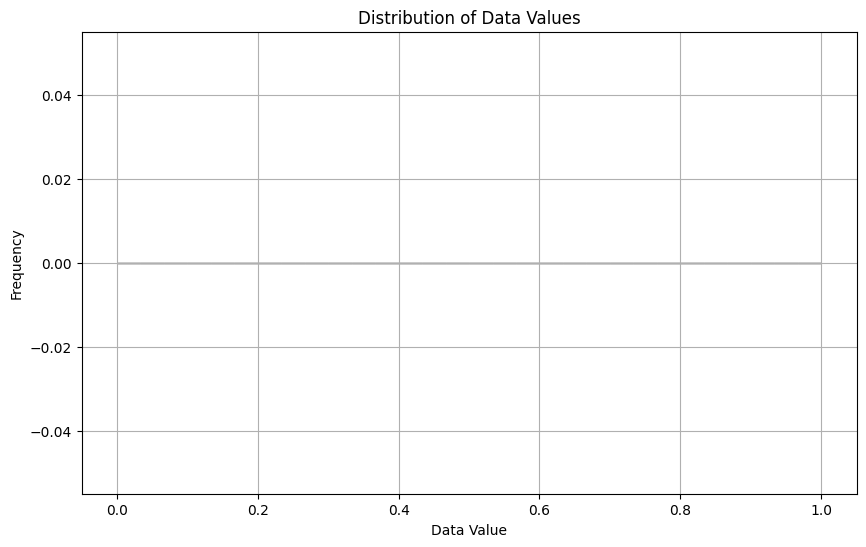

In [117]:
import matplotlib.pyplot as plt

# Plot histogram for 'data_value'
plt.figure(figsize=(10, 6))
plt.hist(alzheimer_disease_df['value'].dropna(), bins=30, edgecolor='k')
plt.title('Distribution of Data Values')
plt.xlabel('Data Value')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


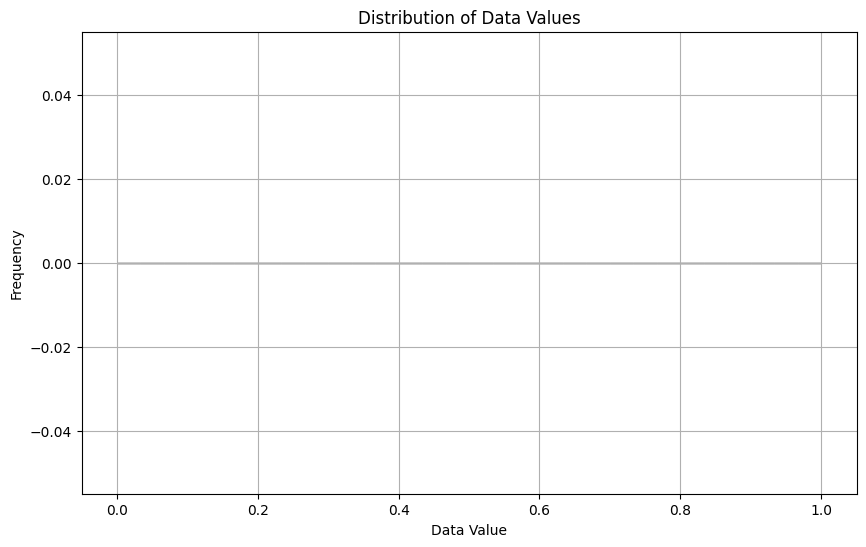

In [122]:
# Plot histogram for 'data_value'
plt.figure(figsize=(10, 6))
plt.hist(alzheimer_disease_df['value'].dropna(), bins=30, edgecolor='k')
plt.title('Distribution of Data Values')
plt.xlabel('Data Value')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

/tmp/ipykernel_49219/2442078244.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='start_year', y='value', data=alzheimer_disease_df, ci=None)  # Update 'YearStart' to the correct name if needed


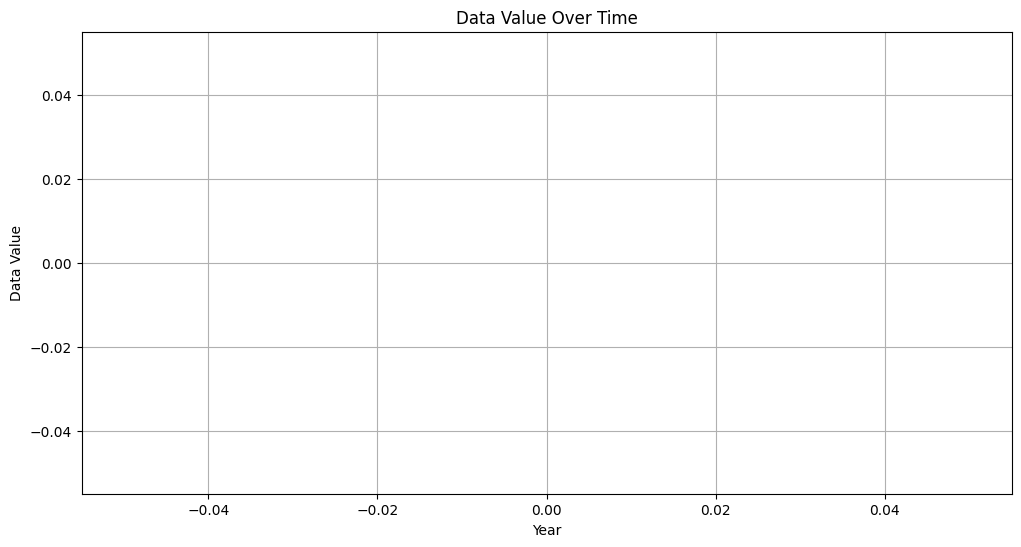

In [126]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='start_year', y='value', data=alzheimer_disease_df, ci=None)  # Update 'YearStart' to the correct name if needed
plt.title('Data Value Over Time')
plt.xlabel('Year')
plt.ylabel('Data Value')
plt.grid(True)
plt.show()

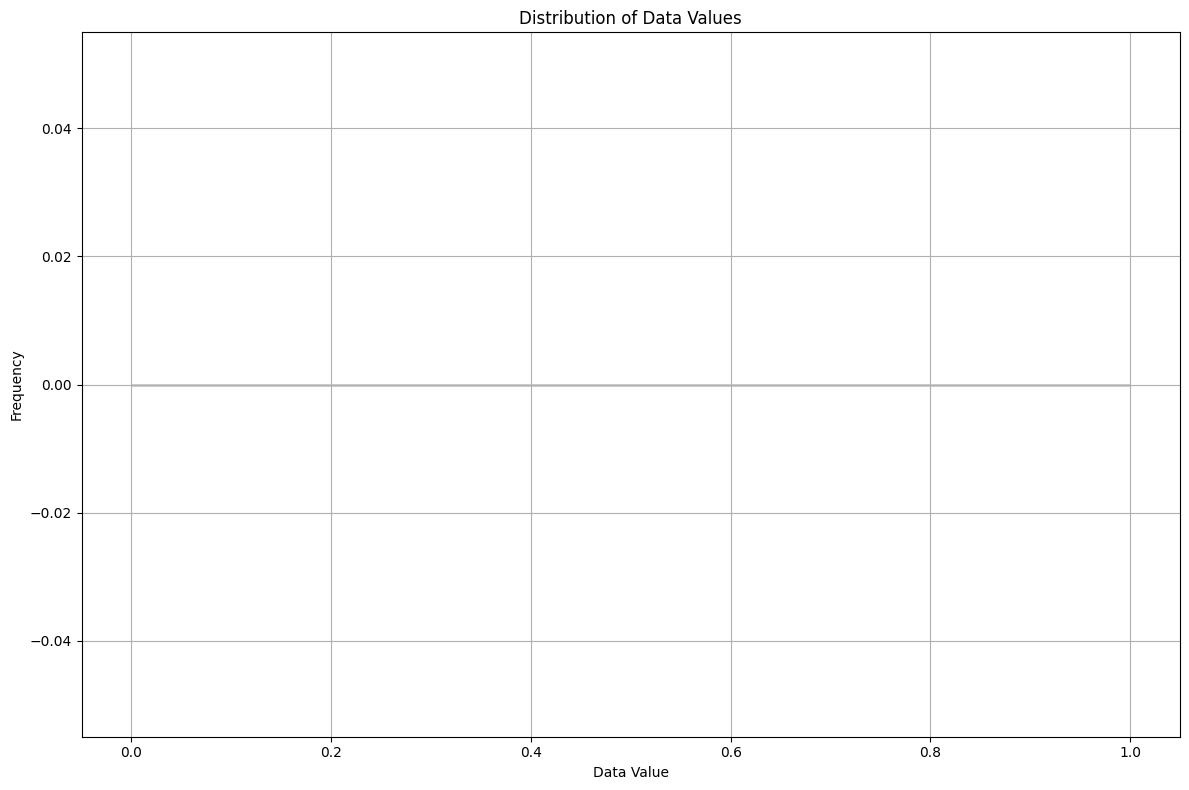

In [128]:
# Plotting a histogram of the 'Data_Value' column
plt.figure(figsize=(12, 8))
plt.hist(alzheimer_disease_df['value'].dropna(), bins=20, edgecolor='black', color='skyblue')  # Adjust bins as needed
plt.xlabel('Data Value')
plt.ylabel('Frequency')
plt.title('Distribution of Data Values')
plt.grid(True)
plt.tight_layout()
plt.show()


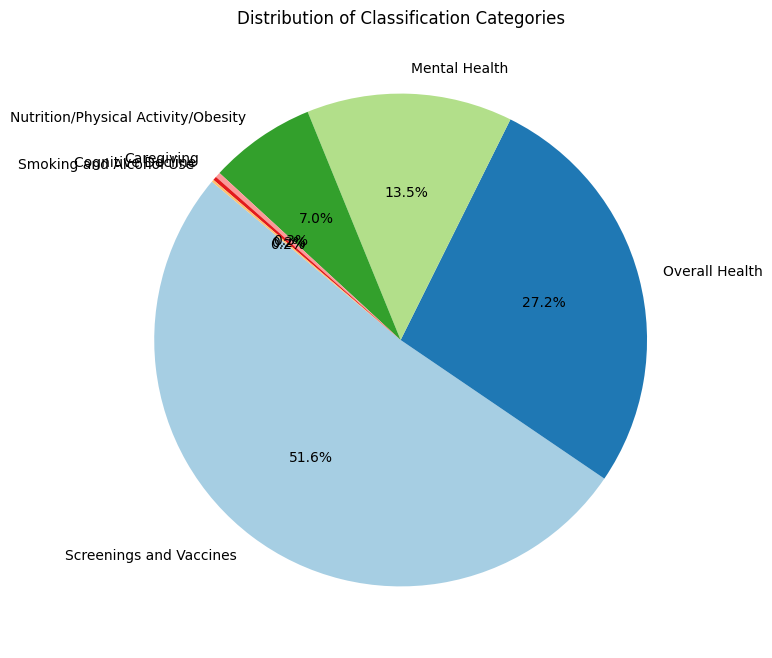

In [130]:
# Aggregate counts for the 'classification' column
classification_counts = alzheimer_disease_df['class'].value_counts()

# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(classification_counts, labels=classification_counts.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired(range(len(classification_counts))))
plt.title('Distribution of Classification Categories')
plt.show()
